In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
positiveSalivaSensor1Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 1 (AA)/Saliva/Positiva'
positiveSalivaSensor2Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 2 (PEI)/Saliva/Positiva'
negativeSalivaSensor1Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 1 (AA)/Saliva/Negativa'
negativeSalivaSensor2Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 2 (PEI)/Saliva/Negativa'
positiveUrineSensor1Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 1 (AA)/Urina/Positiva'
positiveUrineSensor2Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 2 (PEI)/Urina/Positiva'
negativeUrineSensor1Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 1 (AA)/Urina/Negativa'
negativeUrineSensor2Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 2 (PEI)/Urina/Negativa'

def getFilesList():
    salivaFiles = next(os.walk(positiveSalivaSensor1Path), (None, None, []))[2] +\
                  next(os.walk(positiveSalivaSensor2Path), (None, None, []))[2] +\
                  next(os.walk(negativeSalivaSensor1Path), (None, None, []))[2] +\
                  next(os.walk(negativeSalivaSensor2Path), (None, None, []))[2]

    urineFiles = next(os.walk(positiveUrineSensor1Path), (None, None, []))[2] +\
                 next(os.walk(positiveUrineSensor2Path), (None, None, []))[2] +\
                 next(os.walk(negativeUrineSensor1Path), (None, None, []))[2] +\
                 next(os.walk(negativeUrineSensor2Path), (None, None, []))[2]

    return salivaFiles, urineFiles

def getFilesToDataframe(path, filelist):
    df = pd.read_csv(f'{path}/{filelist}', delimiter = "\t", header = None, decimal=",")
    return df

def convertColumnsToNumbers(df):
    df.replace(',', '.', inplace = True, regex = True)
    df = df.astype(float)
    return df

def applyLog10(df):
    df[0] = np.log10(df[0]+1)
    return df

def roundCols(df):
    cols = [np.round(x, 3) for x in df.columns.values]
    df.columns = cols
    return df

def preprocessingData(df, pathName):
    new_df = convertColumnsToNumbers(df)
    new_df = applyLog10(new_df)
    new_df = new_df.set_index(0).T
    new_df = roundCols(new_df)
    new_df['target'] = 1 if 'positive' in pathName else 0
    new_df['sensorType'] = 1 if '1' in pathName else 2
    new_df['substanceType'] = 'Saliva' if 'Saliva' in pathName else 'Urine'
    return new_df

def mergeData(df1, df2, how):
    return pd.merge(df1, df2, how = how)

def resetIndexes(dfs, inplace, drop):
    for df in dfs:
        df.reset_index(inplace = inplace, drop = drop)

def concatAllFiles(urlFiles, fileList):
    df_merged = pd.DataFrame()
    df_sensor1 = pd.DataFrame()
    df_sensor2 = pd.DataFrame()
    n = 0

    for pathName, filePath in urlFiles.items():
        for i in range(1, 11):
            filename = str(i) + '.txt'
            new_df = getFilesToDataframe(filePath, filename)

            if '1' in pathName:
                sample = preprocessingData(new_df, pathName)
                df_sensor1 = pd.concat([df_sensor1, sample])
            else:
                sample = preprocessingData(new_df, pathName)
                df_sensor2 = pd.concat([df_sensor2, sample])

    #columnsSensor1 = set(df_sensor1.columns)
    #columnsSensor2 = set(df_sensor2.columns)
    #mergedColumns = columnsSensor2.intersection(columnsSensor1)

    df_merged = mergeData(df_sensor1, df_sensor2, 'outer')
    resetIndexes([df_merged, df_sensor1, df_sensor2], True, True)

    return df_merged, df_sensor1, df_sensor2

        

salivaFiles, urineFiles = getFilesList()

allFiles = {'salivaFiles': salivaFiles, 
            'urineFiles': urineFiles}

urlFiles = {'positiveSalivaSensor1': positiveSalivaSensor1Path, 
            'positiveSalivaSensor2': positiveSalivaSensor2Path, 
            'negativeSalivaSensor1': negativeSalivaSensor1Path, 
            'negativeSalivaSensor2': negativeSalivaSensor2Path, 
            'positiveUrineSensor1': positiveUrineSensor1Path, 
            'positiveUrineSensor2': positiveUrineSensor2Path, 
            'negativeUrineSensor1': negativeUrineSensor1Path, 
            'negativeUrineSensor2': negativeUrineSensor2Path}


df, df1, df2 = concatAllFiles(urlFiles, allFiles)  



df1.head()

,-0.222,-0.211,-0.201,-0.19,-0.181,-0.171,-0.161,-0.152,-0.143,-0.134,...,0.232,0.236,0.24,0.243,0.247,0.251,0.254,target,sensorType,substanceType
0,1.372380e-06,9.760030e-07,7.926390e-07,6.840420e-07,6.236630e-07,6.024080e-07,5.988530e-07,6.162030e-07,6.536330e-07,6.927720e-07,...,4.630160e-07,5.643800e-07,6.596410e-07,7.487990e-07,8.440600e-07,9.271140e-07,1.016270e-06,1,1,Saliva
1,5.979030e-07,1.060260e-07,-1.255360e-07,-2.646290e-07,-3.432980e-07,-3.774120e-07,-3.877210e-07,-3.683070e-07,-3.293300e-07,-2.720740e-07,...,3.098460e-07,4.118420e-07,5.229920e-07,6.463490e-07,7.788620e-07,9.144260e-07,1.062200e-06,1,1,Saliva
2,3.712900e-07,-1.177110e-07,-3.579930e-07,-5.024500e-07,-5.873980e-07,-6.265690e-07,-6.407170e-07,-6.255670e-07,-5.864610e-07,-5.309670e-07,...,2.451220e-07,3.466360e-07,4.542540e-07,5.801830e-07,7.122150e-07,8.534020e-07,1.009850e-06,1,1,Saliva
3,1.654070e-06,1.279370e-06,1.097240e-06,9.892640e-07,9.239530e-07,8.941040e-07,8.797880e-07,8.828980e-07,9.000160e-07,9.233280e-07,...,2.670720e-07,3.263350e-07,3.794930e-07,4.357040e-07,5.010700e-07,5.633840e-07,6.318010e-07,1,1,Saliva
4,9.801290e-07,4.811820e-07,2.333940e-07,7.898970e-08,-1.773620e-08,-7.234780e-08,-1.026370e-07,-1.036290e-07,-8.582250e-08,-5.599190e-08,...,1.386390e-07,2.070130e-07,2.845430e-07,3.681760e-07,4.640160e-07,5.659590e-07,6.770580e-07,1,1,Saliva


In [ ]:
from scipy.stats import kurtosis, skew

def extractingStatistics(df):

    stats_df = pd.DataFrame(columns = ['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis'])

    for i in range(len(df)):
        sample = df.iloc[i,:-3].values
        stats_df.loc[i] = [np.mean(sample), 
                           np.std(sample),
                           np.min(sample),
                           np.quantile(sample, 0.25),
                           np.quantile(sample, 0.5),
                           np.quantile(sample, 0.75),
                           np.max(sample),
                           skew(list(sample)),
                           kurtosis(list(sample))]
    return stats_df


stats_sensor1 = extractingStatistics(df1)
stats_sensor1

,mean,std,min,25%,50%,75%,max,skew,kurtosis
0,9.380869e-07,8.325974e-07,-2.395240e-09,3.073400e-07,7.162040e-07,0.000001,0.000003,1.018037,-0.051518
1,6.701403e-07,8.969014e-07,-3.877210e-07,3.919530e-08,3.098460e-07,0.000001,0.000003,1.081002,-0.078489
2,6.070796e-07,9.479644e-07,-6.407170e-07,1.911710e-08,2.451220e-07,0.000001,0.000003,0.967346,-0.172530
3,1.043799e-06,9.489534e-07,0.000000e+00,2.729300e-07,8.828980e-07,0.000002,0.000003,0.962110,-0.224483
4,7.646989e-07,9.609119e-07,-1.036290e-07,7.898970e-08,3.256720e-07,0.000001,0.000003,1.194054,-0.017227
5,7.246675e-07,9.931232e-07,-3.062710e-07,4.797970e-08,2.714320e-07,0.000001,0.000003,1.151197,-0.077536
6,6.975399e-07,1.005956e-06,-4.036720e-07,1.708920e-08,2.388190e-07,0.000001,0.000003,1.122277,-0.106069
7,6.523282e-07,1.019762e-06,-5.574200e-07,1.470720e-08,1.959170e-07,0.000001,0.000003,1.055320,-0.164439
8,9.774871e-07,8.383119e-07,-6.423580e-10,3.261350e-07,8.580310e-07,0.000001,0.000003,0.892878,-0.252383
9,7.297735e-07,8.555901e-07,-4.558400e-08,1.000040e-07,3.668760e-07,0.000001,0.000003,1.181780,-0.019366


In [ ]:
stats_sensor2 = extractingStatistics(df2)
stats_sensor2

,mean,std,min,25%,50%,75%,max,skew,kurtosis
0,0.000005,0.000008,-3.590030e-08,2.746635e-07,1.429085e-06,0.000005,0.000026,1.574673,0.944890
1,0.000005,0.000008,-6.806140e-08,7.679212e-08,9.507035e-07,0.000005,0.000025,1.586576,0.981478
2,0.000004,0.000007,-7.584520e-08,6.757668e-08,6.966810e-07,0.000004,0.000022,1.582958,0.960101
3,0.000004,0.000007,-1.879860e-07,5.330257e-08,8.708305e-07,0.000004,0.000022,1.566502,0.927028
4,0.000005,0.000008,-4.167390e-08,3.178733e-07,1.275205e-06,0.000005,0.000024,1.543288,0.842382
5,0.000005,0.000007,-7.055330e-09,1.522030e-07,1.082700e-06,0.000005,0.000023,1.527464,0.813783
6,0.000005,0.000007,-1.232850e-07,8.979415e-08,9.868240e-07,0.000005,0.000022,1.535711,0.841374
7,0.000005,0.000007,-1.621920e-09,3.643540e-07,1.251650e-06,0.000005,0.000023,1.564024,0.923679
8,0.000005,0.000007,-1.178750e-07,1.109685e-07,1.087635e-06,0.000005,0.000022,1.553585,0.911910
9,0.000004,0.000007,-1.879860e-07,5.330257e-08,8.708305e-07,0.000004,0.000022,1.566502,0.927028


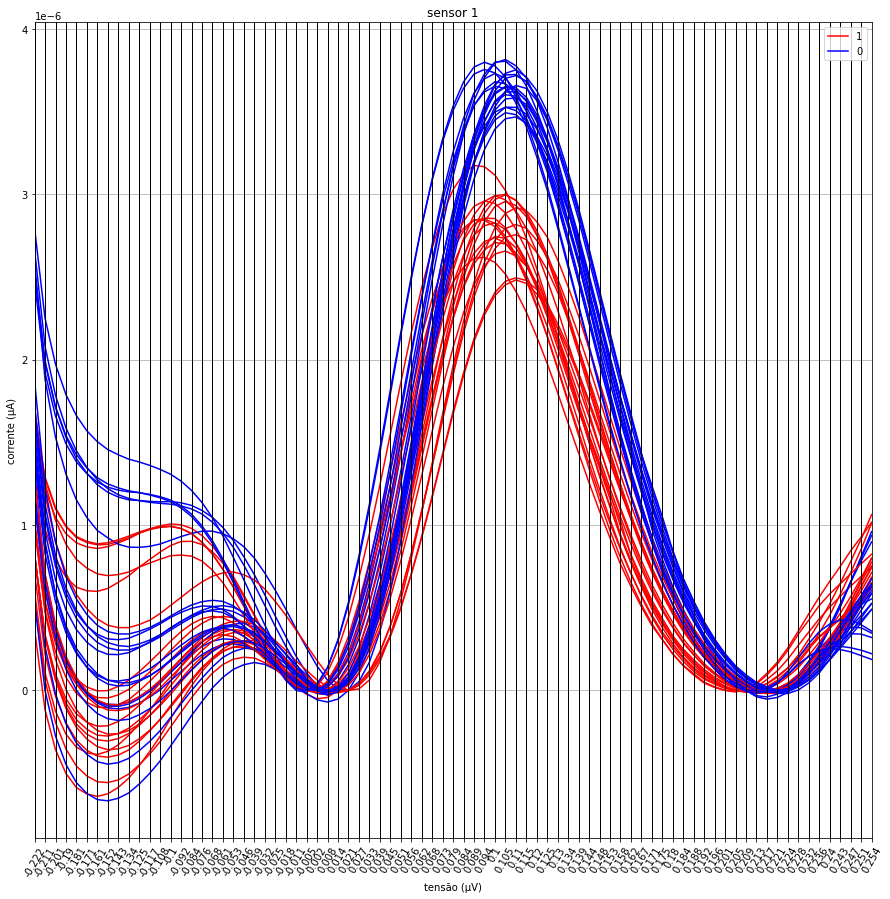

In [ ]:
def plotParallelCoordinates(df, title, xlabel, ylabel, target, colors):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))

    new_df = df.drop(['sensorType', 'substanceType'], axis = 1)

    pd.plotting.parallel_coordinates(frame = new_df, class_column = target, ax = ax, color = colors)
    ax.set(title = title,
           xlabel = xlabel,
           ylabel = ylabel)
    plt.xticks(rotation = 60)
    
    plt.show()


plotParallelCoordinates(df = df1,
                        title = 'sensor 1',
                        xlabel = 'tensão (µV)',
                        ylabel = 'corrente (µA)',
                        target = 'target',
                        colors = ['red', 'blue']
                        )


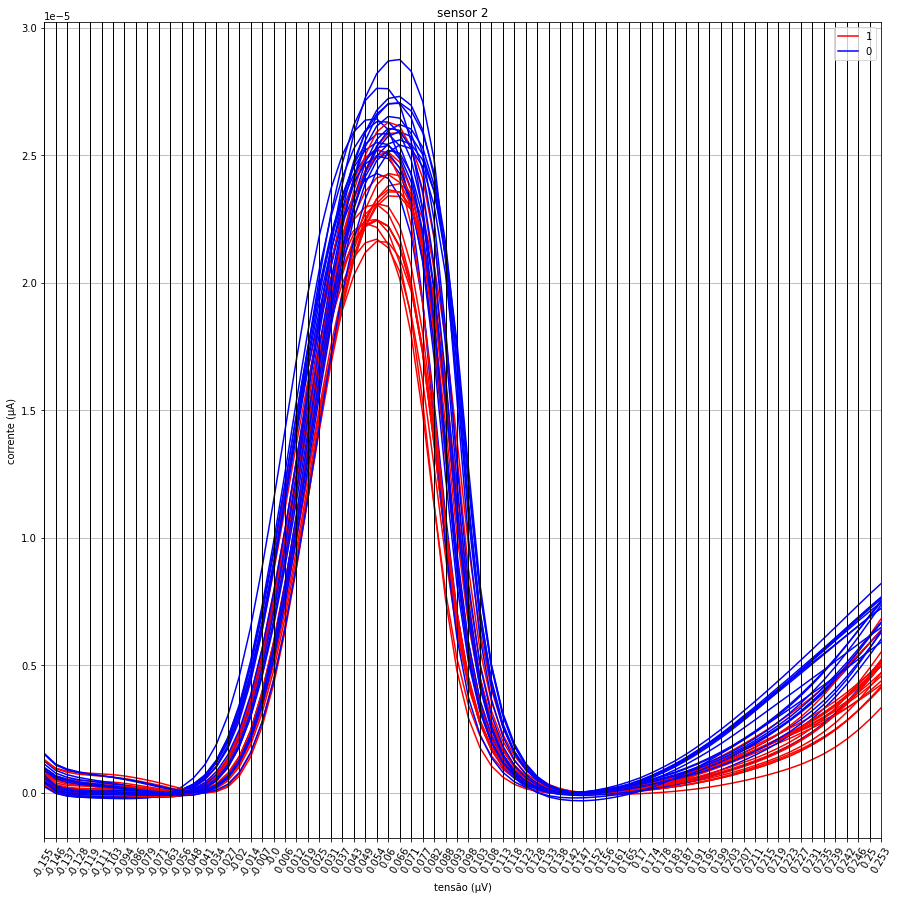

In [ ]:
plotParallelCoordinates(df = df2,
                        title = 'sensor 2',
                        xlabel = 'tensão (µV)',
                        ylabel = 'corrente (µA)',
                        target = 'target',
                        colors = ['red', 'blue']
                        )


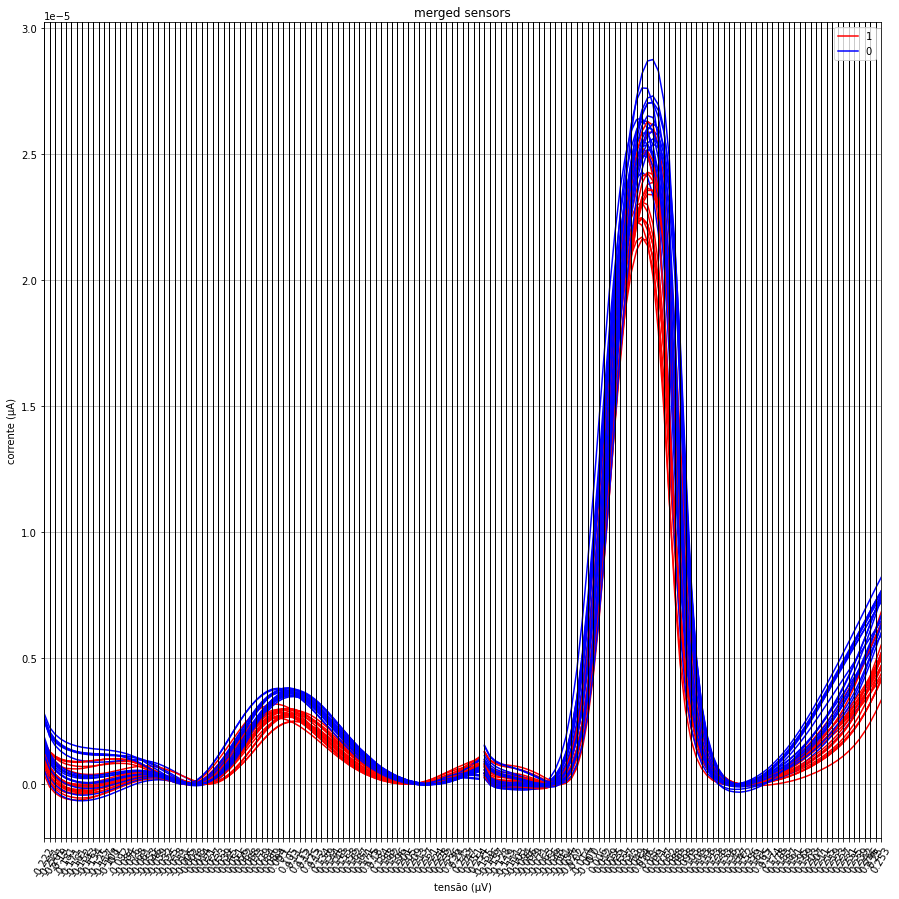

In [ ]:
plotParallelCoordinates(df = df,
                        title = 'merged sensors',
                        xlabel = 'tensão (µV)',
                        ylabel = 'corrente (µA)',
                        target = 'target',
                        colors = ['red', 'blue']
                        )

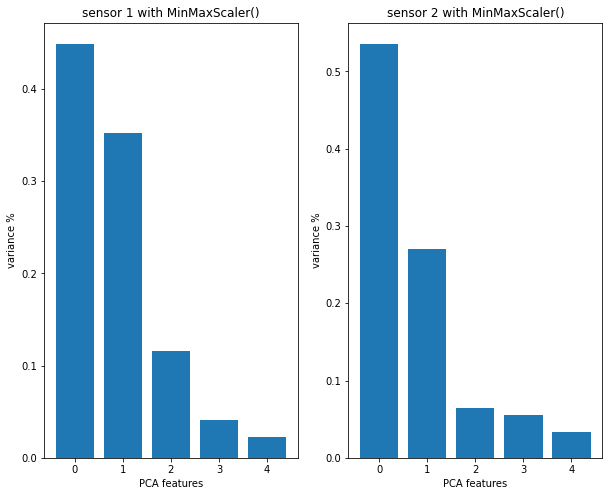

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


def calculatingPCA(df, nameSensor, scaler, n_components, ax):
    X = df.drop(['target', 'sensorType', 'substanceType'], axis = 1)
    X_std = scaler.fit_transform(X)
    pca = PCA(n_components = n_components)
    principalComponents = pca.fit_transform(X_std)
    
    new_df = pd.DataFrame(principalComponents)
    new_df['target'] = df['target'].values

    features = np.arange(pca.n_components)
    ax.bar(features, pca.explained_variance_ratio_)
    ax.set(xlabel = 'PCA features', ylabel = 'variance %', xticks = features, title = f'{nameSensor} with {scaler}')
    
    return new_df


fig, ax = plt.subplots(1, 2, figsize = (10, 8))

PCA_components = {}
PCA_components['sensor1'] = calculatingPCA(df1, 'sensor 1', MinMaxScaler(), 5, ax[0])
PCA_components['sensor2'] = calculatingPCA(df2, 'sensor 2', MinMaxScaler(), 5, ax[1])

plt.show()


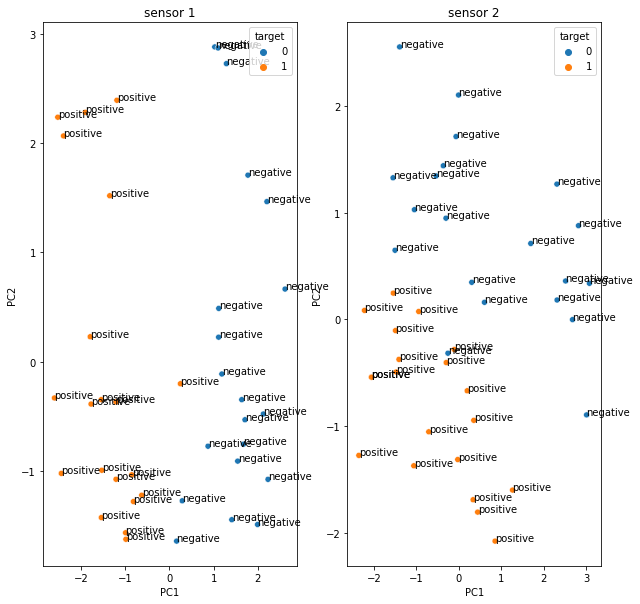

In [ ]:
def writeInPlot(df, ax):
    for i in range(len(df)):
        name = 'positive' if df['target'][i] == 1 else 'negative'
        ax.text(x = df.loc[i, 0], y = df.loc[i,1], s = name)


def plotPCA(df, title, ax):
    
    sns.scatterplot(data = df, x = 0, y = 1, hue = 'target', ax = ax)
    ax.set(xlabel = 'PC1', ylabel = 'PC2', title = title)
    writeInPlot(df, ax)
    

fig, ax = plt.subplots(1, 2, figsize = (10, 10))

plotPCA(df = PCA_components['sensor1'], 
        title = 'sensor 1', 
        ax = ax[0]
        )

plotPCA(df = PCA_components['sensor2'], 
        title = 'sensor 2', 
        ax = ax[1]
        )

plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

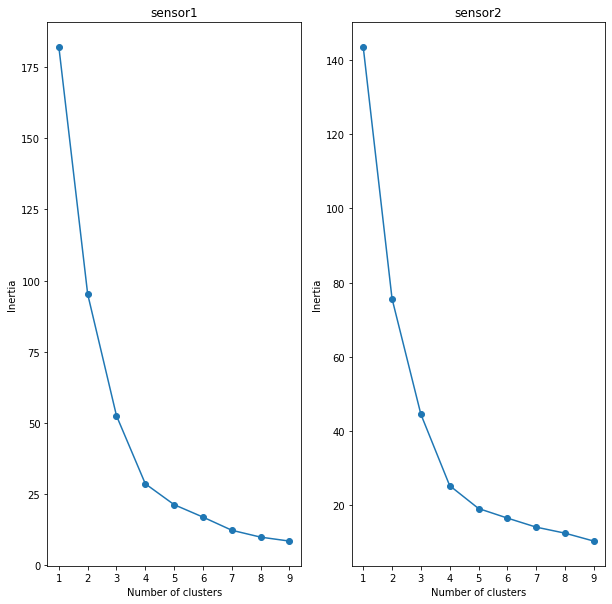

In [ ]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(1, 2, figsize = (10, 10))

ks = range(1, 10)

inertia_model1 = []
inertia_model2 = []


for k in ks:

    np.random.seed(42)
    model1 = KMeans(n_clusters = k)
    model2 = KMeans(n_clusters = k)

    model1.fit(PCA_components['sensor1'].iloc[:, :2])
    model2.fit(PCA_components['sensor2'].iloc[:, :2])

    inertia_model1.append(model1.inertia_)
    inertia_model2.append(model2.inertia_) 

ax[0].plot(ks, inertia_model1, '-o')
ax[0].set(xlabel = 'Number of clusters', ylabel = 'Inertia', title = 'sensor1', xticks = ks)
ax[1].plot(ks, inertia_model2, '-o')
ax[1].set(xlabel = 'Number of clusters', ylabel = 'Inertia', title = 'sensor2', xticks = ks)

plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

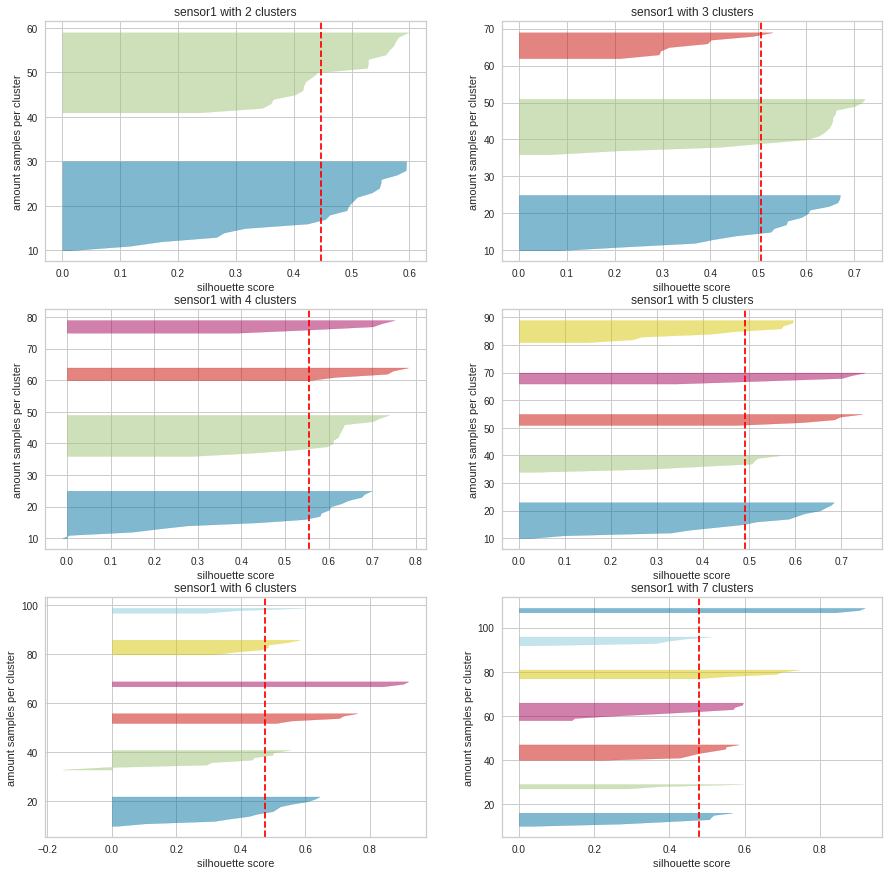

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

def plotSilhoetteVisualizer(X, Ks, ax, sensorName):
    silhouette_coef_list = []
    for k in Ks:
        np.random.seed(42)
        km_model = KMeans(n_clusters = k)
        q, mod = divmod(k,2)
        visualizer = SilhouetteVisualizer(km_model, colors = 'yellowbrick', ax = ax[q-1][mod])
        ax[q-1][mod].set(title = f'{sensorName} with {k} clusters', 
                         xlabel = 'silhouette score', 
                         ylabel = 'amount samples per cluster')
        visualizer.fit(X)
        #print(f"{sensorName}: the silhouette's score for {k} clusters is {visualizer.silhouette_score_}")
        silhouette_coef_list.append(visualizer.silhouette_score_)
    return silhouette_coef_list


fig, ax = plt.subplots(3, 2, figsize = (15, 15))
Ks = [2,3,4,5,6,7]
X_sensor1 = PCA_components['sensor1'].iloc[:, :2]
silhouette_sensor1 = plotSilhoetteVisualizer(X_sensor1, Ks, ax, 'sensor1')

plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

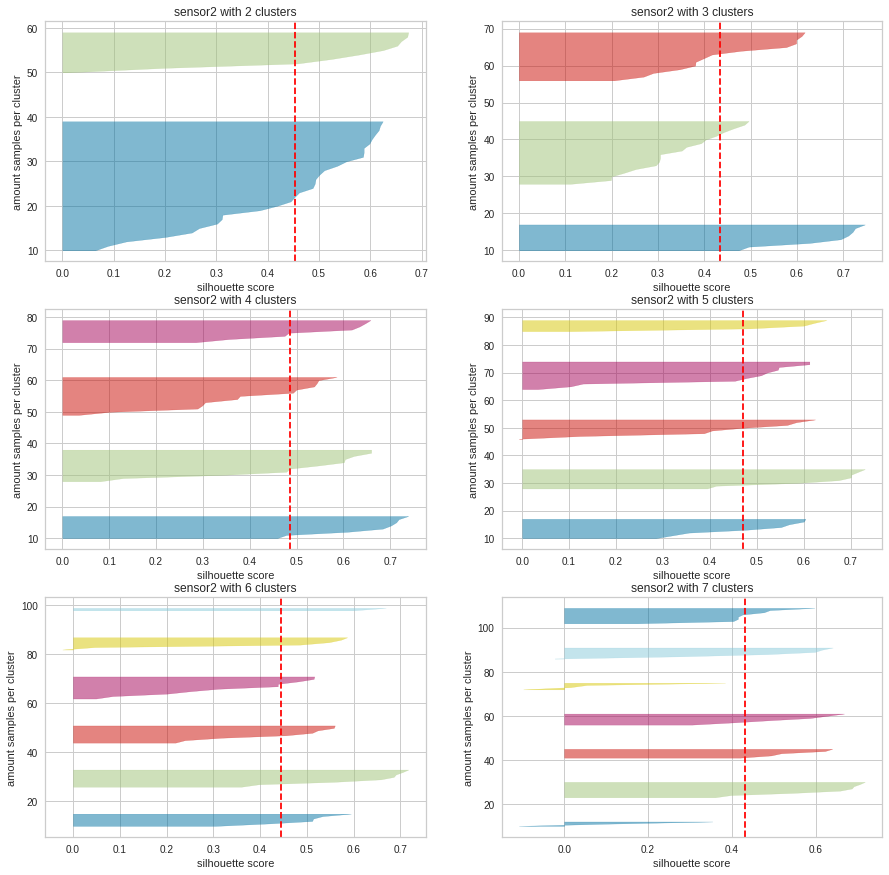

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (15, 15))
X_sensor2 = PCA_components['sensor2'].iloc[:, :2]
Ks = [2,3,4,5,6,7]

silhouette_sensor2 = plotSilhoetteVisualizer(X_sensor2, Ks, ax, 'sensor2')

plt.show()

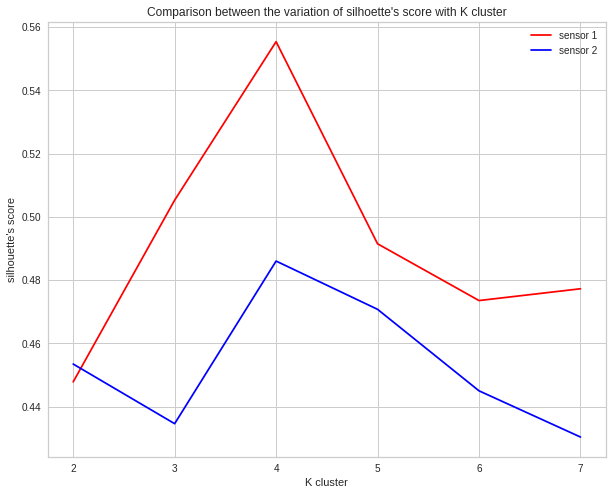

In [ ]:
def plot_silhouette_score(silhouette_scores, ax, Ks):
    sns.lineplot(data = silhouette_scores, x= 'Ks', y = 'sensor_1', color = 'red', ax=ax, label = 'sensor 1')
    sns.lineplot(data = silhouette_scores, x= 'Ks', y = 'sensor_2', color = 'blue', ax=ax, label = 'sensor 2')
    ax.set(title = "Comparison between the variation of silhoette's score with K cluster",
           xlabel = 'K cluster',
           ylabel = "silhouette's score"
    )
    plt.legend()

Ks = [2,3,4,5,6,7]
silhouette_scores = {
    'sensor_1': silhouette_sensor1,
    'sensor_2': silhouette_sensor2,
    'Ks': Ks
}


fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_silhouette_score(silhouette_scores, ax, Ks)

plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


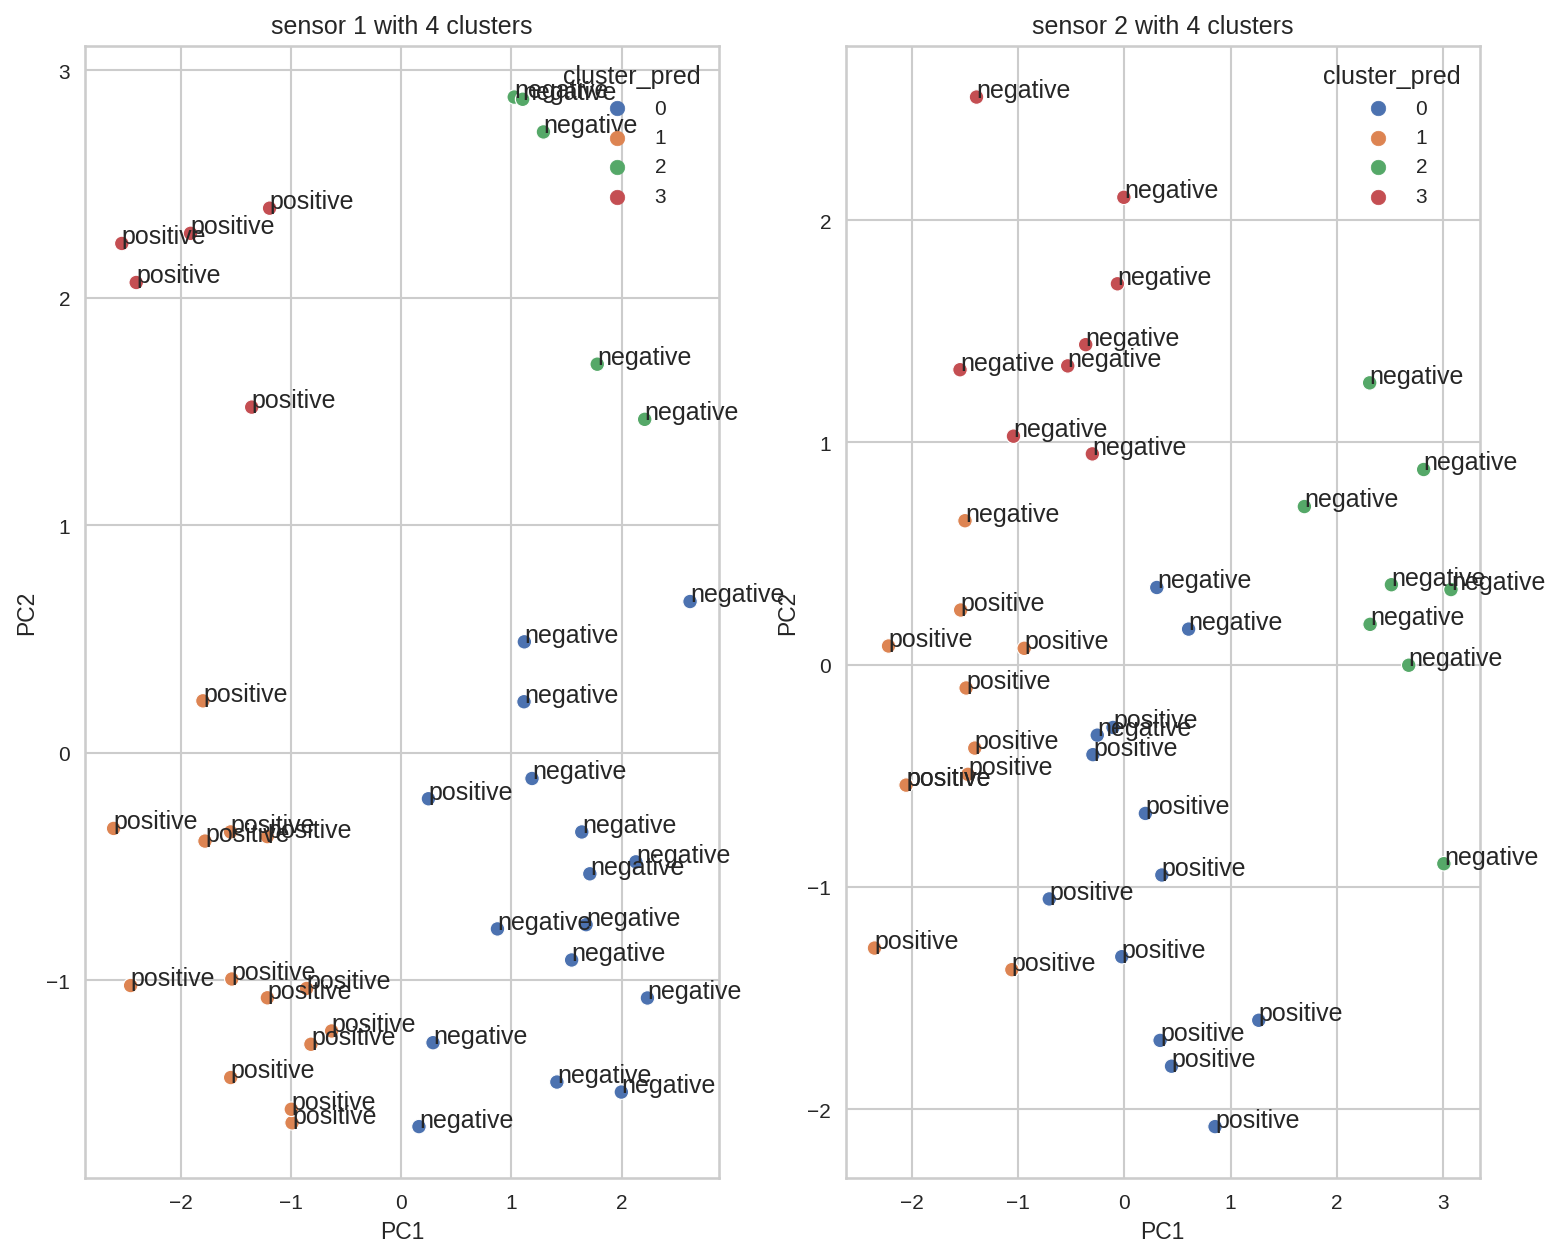

In [ ]:
X_list = [X_sensor1, X_sensor2]
fig, ax = plt.subplots(1, 2, figsize = (12,10), dpi = 150)
i = 0

for X in X_list:

    kmeans = KMeans(n_clusters=4)
    cluster_pred = kmeans.fit_predict(X)
    X['cluster_pred'] = cluster_pred
    sns.scatterplot(data = X, x = 0, y = 1, hue = 'cluster_pred', ax = ax[i], palette = 'deep')
    ax[i].set(title = f'sensor {i+1} with 4 clusters',
              xlabel = 'PC1',
              ylabel = 'PC2')
    writeInPlot(PCA_components[f'sensor{i+1}'], ax[i])
    i+= 1


CODE EXPLANATION

The code initializes several lists to store the results of the analysis: loc_list will store the locations of the peaks, band_list will store the frequencies of the peaks, prom_list will store the prominences (heights) of the peaks, width_half_list will store the half-widths of the peaks, width_full_list will store the full widths of the peaks, and q_factor will store the Q factors of the peaks.

The code then loops through each row of the dataset (assumed to be a Pandas DataFrame), and for each row it uses the find_peaks and peak_prominences functions from the scipy.signal library to find the locations and prominences of the peaks in the signal.

The code then calculates the maximum prominence of the peaks, and checks whether any of the other peaks have a prominence greater than one third of the maximum prominence. If not, then the code considers the peak to be valid and calculates its frequency (band), half-width (width_half), and full width (width_full) using the peak_widths function from scipy.signal.

Finally, the code appends the calculated properties of the valid peaks to the appropriate lists, and creates a Pandas DataFrame peaks that summarizes the results of the analysis. The q_factor column of the DataFrame is calculated by dividing the prominence of each peak by its half-width, which is a common measure of the quality factor (Q factor) of the peak in signal processing applications.

--------------------------

In signal processing, Q-factor (also known as quality factor) is a measure of the quality of a resonant circuit or filter. It is defined as the ratio of the energy stored in the resonant circuit or filter to the energy dissipated per cycle, and is therefore a measure of how selective or narrowband the circuit or filter is.

The Q-factor is calculated as the center frequency divided by the bandwidth at the half-power points (i.e., the points at which the power is half the maximum power). A high Q-factor means that the circuit or filter is highly selective, with a narrow bandwidth and a high degree of resonance at the center frequency. In contrast, a low Q-factor means that the circuit or filter is less selective, with a wider bandwidth and a lower degree of resonance at the center frequency




In [ ]:
## PICOS

from scipy.signal import find_peaks, peak_prominences, peak_widths


def creatingPeakDataFrame(df, band_list, prom_list, width_half_list, width_full_list):
    pd.set_option('display.float_format', '{:.2g}'.format)

    peaks = pd.DataFrame({'band': np.array(band_list), 
                          'prominence': np.array(prom_list),
                          'half_width': np.array(width_half_list),
                          'full_width': np.array(width_full_list)
                          })
    
    peaks['q_factor'] = peaks['prominence']/peaks['half_width']
    peaks['target'] = df['target']

    return peaks

def calculateWidth(x, width_peaks):
    return x.index[int(width_peaks[3])] - x.index[int(width_peaks[2])]

def extractingPeakMeasures(x, peak_location, prominences):

    # Find the location of the peak with the maximum prominence
    peak_index = peak_location[np.argmax(prominences)]
    # Calculate the frequency (band) of the peak
    band = x.index[peak_index]

    # Calculate the full-width and half-width of the peak
    half_width_peaks = peak_widths(x, [peak_index], rel_height = 0.5)
    full_width_peaks = peak_widths(x, [peak_index], rel_height = 1.0)

    half_width = calculateWidth(x, half_width_peaks)
    full_width = calculateWidth(x, full_width_peaks)

    return band, half_width, full_width


def extractingPeaks(x):
    peak_location, _ = find_peaks(x)
    prominences = peak_prominences(x, peak_location)[0]
    max_prom = np.max(prominences)
    others_prom = np.delete(prominences, np.argmax(prominences))

    return peak_location, prominences, max_prom, others_prom


def findPeaks(df):
    band_list=[]
    prom_list=[]
    width_half_list=[]
    width_full_list=[]

    for i in range(len(df)):
        x = df.iloc[i,:-3]

        peak_location, prominences, max_prom, others_prom = extractingPeaks(x)
        otherPromGreaterThanPeak = others_prom > max_prom/3

        if not otherPromGreaterThanPeak.any():
            band, width_half, width_full = extractingPeakMeasures(x, peak_location, prominences)

            band_list.append(band)
            prom_list.append(max_prom)
            width_half_list.append(width_half)
            width_full_list.append(width_full)
    
    peaks = creatingPeakDataFrame(df, band_list, prom_list, width_half_list, width_full_list)
    return peaks

sensor1_peaks = findPeaks(df1)
sensor2_peaks = findPeaks(df2)

In [ ]:
sensor1_peaks

,band,prominence,half_width,full_width,q_factor,target
0,0.094,2.9e-06,0.094,0.2,3e-05,1
1,0.1,2.7e-06,0.088,0.2,3.1e-05,1
2,0.1,2.7e-06,0.088,0.3,3.1e-05,1
3,0.089,3.2e-06,0.094,0.21,3.4e-05,1
4,0.1,3e-06,0.088,0.2,3.4e-05,1
5,0.1,3e-06,0.092,0.21,3.3e-05,1
6,0.1,3e-06,0.086,0.32,3.5e-05,1
7,0.1,3e-06,0.086,0.2,3.4e-05,1
8,0.089,2.8e-06,0.094,0.2,3e-05,1
9,0.1,2.7e-06,0.092,0.2,2.9e-05,1


In [ ]:
sensor2_peaks

,band,prominence,half_width,full_width,q_factor,target
0,0.066,2.6e-05,0.081,0.2,0.00032,1
1,0.06,2.5e-05,0.076,0.21,0.00033,1
2,0.054,2.2e-05,0.076,0.21,0.00029,1
3,0.054,2.2e-05,0.076,0.21,0.0003,1
4,0.066,2.4e-05,0.074,0.2,0.00032,1
5,0.054,2.3e-05,0.076,0.21,0.0003,1
6,0.049,2.2e-05,0.082,0.21,0.00027,1
7,0.06,2.3e-05,0.081,0.2,0.00029,1
8,0.054,2.2e-05,0.076,0.2,0.0003,1
9,0.054,2.2e-05,0.076,0.21,0.0003,1


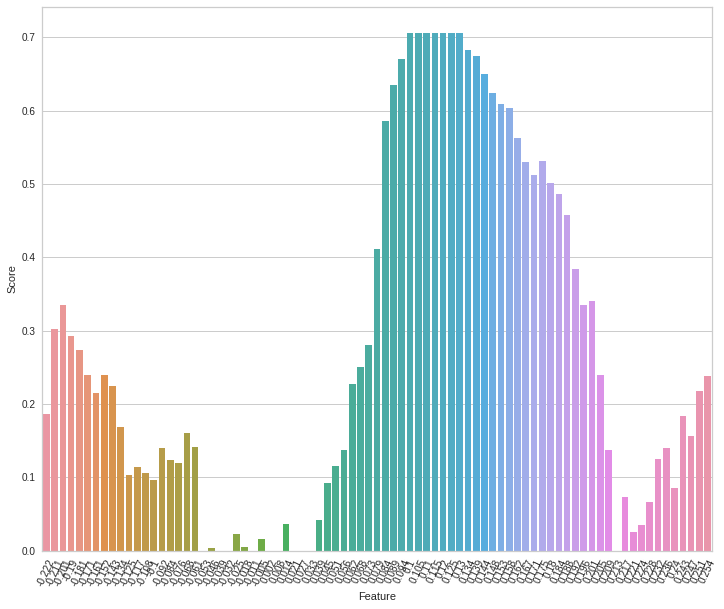

In [ ]:
## replicar as 5 features selection do arquivo mi
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

def splitData(df):
    x = df.drop(['target', 'sensorType', 'substanceType'], axis = 1)
    y = df['target']

    return x, y

def createEstimatorScoreDF(x, estimatorScore, sortedIdx):
    estimatorScoreDF = pd.DataFrame(estimatorScore[sortedIdx[::-1]], index=x.columns[sortedIdx[::-1]], columns=['score'])
    return estimatorScoreDF

def plotEstimatorScore(x, sortedIdx, estimatorScore):
    fig, ax = plt.subplots(1,1, figsize = (12,10))
    sns.barplot(x = x.columns[sortedIdx], y = estimatorScore[sortedIdx])
    ax.set(xlabel = 'Feature', ylabel = 'Score')
    plt.xticks(rotation = 65)
    plt.show()

def estimatorScore(x, y):
    estimatorScore = mutual_info_classif(x, y, random_state = 42)
    sortedIdx = np.argsort(estimatorScore)

    estimatorScoreDF = createEstimatorScoreDF(x, estimatorScore, sortedIdx)

    plotEstimatorScore(x, sortedIdx, estimatorScore)

    return estimatorScoreDF

estimator_scores_df = {}

X, y = splitData(df1)
estimator_scores_df['sensor1'] = estimatorScore(X, y)

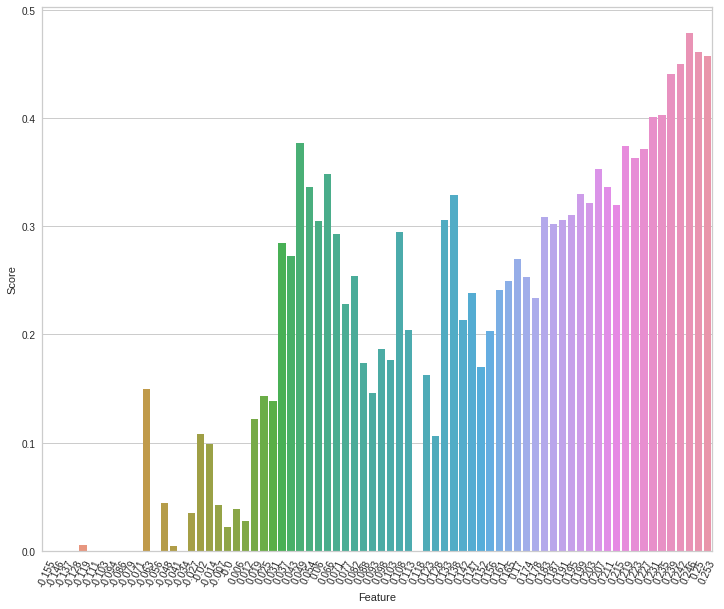

In [ ]:
X, y = splitData(df2)
estimator_scores_df['sensor2'] = estimatorScore(X, y)

In [ ]:
estimator_scores_df['sensor1'].describe()

,score
count,81
mean,0.27
std,0.24
min,0
25%,0.085
50%,0.21
75%,0.5
max,0.71


In [ ]:
def selectKBestFeatures(k, estimatorScore, df):
    k_best = k
    k_best_features = estimatorScore.iloc[:k_best, :].index
    k_best_df = df[k_best_features]
    return k_best_df

k_best_df = {}

k_best_df['sensor1'] = selectKBestFeatures(5, estimator_scores_df['sensor1'], df1)
k_best_df['sensor1']

,0.105,0.11,0.115,0.12,0.125
0,2.7e-06,2.6e-06,2.5e-06,2.3e-06,2.1e-06
1,2.7e-06,2.6e-06,2.5e-06,2.4e-06,2.2e-06
2,2.7e-06,2.7e-06,2.6e-06,2.4e-06,2.3e-06
3,3e-06,2.9e-06,2.7e-06,2.6e-06,2.3e-06
4,3e-06,2.9e-06,2.8e-06,2.7e-06,2.5e-06
5,3e-06,3e-06,2.9e-06,2.8e-06,2.6e-06
6,3e-06,3e-06,2.9e-06,2.8e-06,2.6e-06
7,3e-06,2.9e-06,2.9e-06,2.8e-06,2.6e-06
8,2.7e-06,2.6e-06,2.5e-06,2.3e-06,2.1e-06
9,2.7e-06,2.6e-06,2.6e-06,2.4e-06,2.3e-06


In [ ]:
k_best_df['sensor2'] = selectKBestFeatures(5, estimator_scores_df['sensor2'], df2)
k_best_df['sensor2']

,0.246,0.25,0.253,0.242,0.239
0,3.6e-06,3.9e-06,4.2e-06,3.3e-06,3.1e-06
1,3.2e-06,3.6e-06,4.1e-06,2.8e-06,2.5e-06
2,2.5e-06,2.9e-06,3.3e-06,2.1e-06,1.8e-06
3,3.2e-06,3.7e-06,4.2e-06,2.8e-06,2.5e-06
4,3.6e-06,4e-06,4.4e-06,3.3e-06,3e-06
5,3.9e-06,4.5e-06,5e-06,3.5e-06,3e-06
6,3.6e-06,4.1e-06,4.7e-06,3.1e-06,2.7e-06
7,3.8e-06,4.2e-06,4.6e-06,3.5e-06,3.2e-06
8,3.9e-06,4.5e-06,5e-06,3.5e-06,3.1e-06
9,3.2e-06,3.7e-06,4.2e-06,2.8e-06,2.5e-06
